In [1]:
%load_ext autoreload
%autoreload 2
from random import randint
from busca.classes import ALTURAS, COLUNAS
from busca.classes.gerente import GerenteRemocao
from busca.classes.patio import Container, Pilha, Patio

from utils import gera_agendamento_containers, gera_containers_transito
from visuals import plot_patio

2298


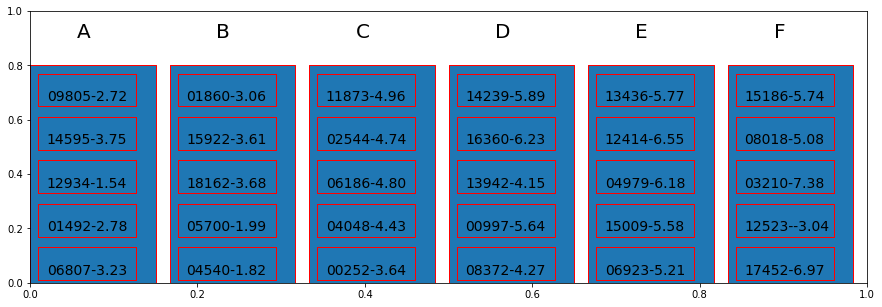

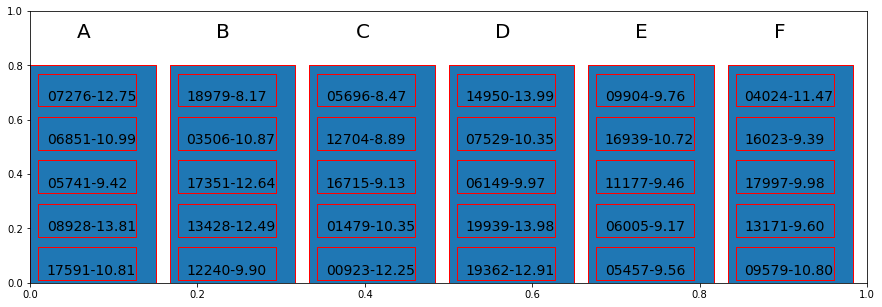

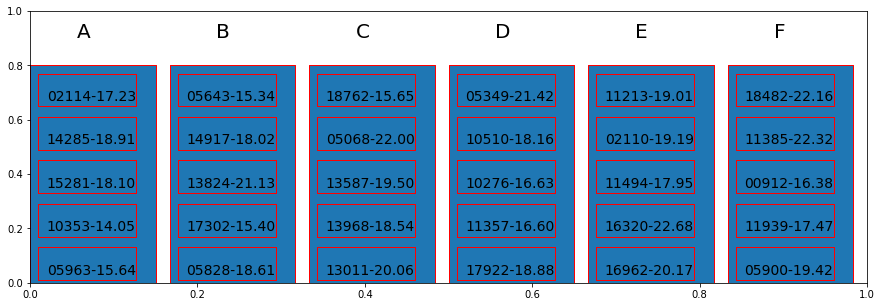

In [2]:
containers_transito = gera_containers_transito()
containers_agendados = gera_agendamento_containers(containers_transito)
patio = Patio()
gerente = GerenteRemocao(patio)
qtde = 0
for dia, containers in containers_agendados.items():
    for c in containers:
        qtde += 1
        containers_transito.pop(containers_transito.index(c))
    gerente.processa_fila_gatein(containers, mode='like')
print(qtde)
plot_patio(patio)
plot_patio(patio, '0013')
plot_patio(patio, '0040')

In [3]:
for pilha in gerente._patio._pilhas.values():
    print(pilha._nome, pilha.time_mean())

0001 4.277805858593873
0002 6.180542834759696
0003 7.3012969331861415
0004 7.546206178059062
0005 8.37925888132371
0006 8.971921676220557
0007 8.898757058823827
0008 8.763992607940347
0009 10.388065620883049
0010 10.067820472793771
0011 10.092209212956943
0012 10.759329760110498
0013 10.735737691728188
0014 11.062253331616454
0015 11.47368433687468
0016 10.7705137599258
0017 11.122498923020375
0018 12.017009611641878
0019 11.568714190288684
0020 12.716020340177904
0021 13.28543526637078
0022 13.436724255681963
0023 13.293797994472122
0024 13.166045350701397
0025 14.628116785455113
0026 13.206172001655306
0027 13.787935184073435
0028 15.540562611547728
0029 14.946994650850922
0030 15.10081019588729
0031 16.511146892915068
0032 15.99013329847254
0033 15.987449281711758
0034 16.682173902895478
0035 17.48251331956938
0036 17.60455039150837
0037 16.88896832394341
0038 18.216342048528826
0039 18.3090596727379
0040 18.554983438546124
0041 19.511981369820628
0042 18.945860370186605
0043 18.976

In [53]:
def monte_carlo(mode_in=None, mode_out=None, turns=100, tamanho_fila=10):
    totalgeral = 0
    totalgatein = totalgateout = 0
    for turn in range(turns):
        # GATE-IN
        fila_in = []
        for ccs_gate_in in range(tamanho_fila):
            totalgatein += 1
            random_ind = randint(0, len(containers_transito) - 1)
            cc_in = containers_transito.pop(random_ind)
            fila_in.append(cc_in)
            containers_agendados[int(cc_in.time_to_leave)].append(cc_in)
            
        gerente.processa_fila_gatein(fila_in, mode=mode_in)

        # GATE-OUT
        fila_out = []
        random_dia = randint(0, len(containers_agendados.keys()))
        containers_dentro = containers_agendados[random_dia]
        if containers_dentro:
            for ccs_gate_out in range(tamanho_fila):
                if len(containers_dentro) == 0:
                    if random_dia < 10:
                        random_dia +=1
                    else:
                        random_dia -=1
                    containers_dentro = containers_agendados.get(random_dia, [])
                    continue
                totalgateout += 1
                random_ind = randint(0, len(containers_dentro) - 1)
                fila_out.append(containers_dentro.pop(random_ind))
            totalremocoes = gerente.processa_fila_gateout(fila_out, mode=mode_out)
            containers_transito.extend(fila_out)
            totalgeral += totalremocoes
    print('Média de remoções: %s' % (totalgeral / (turn + 1)))
    print('Total gatein: %s gateout:%s' % (totalgatein, totalgateout))
    print('Média de remoções ponderada: %s' % (totalgeral / totalgateout))
    return (totalgeral / (turn + 1))

In [54]:
def generate_env(perc_pre_load=.5):
    containers_transito = gera_containers_transito()
    containers_agendados = gera_agendamento_containers(containers_transito)
    patio = Patio()
    gerente = GerenteRemocao(patio)
    pre_load = []
    qtde = 0
    len_containers = [len(containers) for containers in containers_agendados.values()]
    limit = sum(len_containers) * perc_pre_load
    for dia, containers in containers_agendados.items():
        for c in containers:
            pre_load.append(c)
            containers.pop(containers.index(c))
            containers_transito.pop(containers_transito.index(c))
            if qtde > limit:
                break
    return containers_transito, containers_agendados, pre_load    

In [57]:
TURNS = 100
# Separando por tempo...
containers_transito, containers_agendados, pre_load = generate_env()
_ = gerente.processa_fila_gatein(pre_load, mode='like')
print(len(containers_transito), len(pre_load))

18829 1170


In [56]:
monte_carlo(mode_in='like', mode_out=None, turns=TURNS, tamanho_fila=30)

Média de remoções: 196.0
Total gatein: 3000 gateout:2120
Média de remoções ponderada: 9.245283018867925


196.0

In [ ]:
# Separando por tempo E ordenando fila...
containers_transito, containers_agendados, pre_load = generate_env()
_ = gerente.processa_fila_gatein(pre_load, mode='like')
print(len(containers_transito), len(pre_load))
monte_carlo(mode_in='like', mode_out='ordered', turns=TURNS, tamanho_fila=30)

18823 1176


In [35]:
# Separando por tempo E ordenando fila...
containers_transito, containers_agendados, pre_load = generate_env()
_ = gerente.processa_fila_gatein(pre_load, mode='like')
print(len(containers_transito), len(pre_load))
monte_carlo(mode_in='like', mode_out='stay', turns=TURNS, tamanho_fila=30)

Média de remoções: 144.817
Total gatein: 30000 gateout:15984
Média de remoções ponderada: 9.060122622622623


144.817

In [36]:
# Separando por tempo E ordenando fila...
containers_transito, containers_agendados, pre_load = generate_env()
_ = gerente.processa_fila_gatein(pre_load, mode='like')
print(len(containers_transito), len(pre_load))
monte_carlo(mode_in='like', mode_out='ordered+stay', turns=TURNS, tamanho_fila=30)

Média de remoções: 164.475
Total gatein: 30000 gateout:17769
Média de remoções ponderada: 9.25628904271484


164.475

In [37]:
# Sem otimizacao nenhuma...
containers_transito = gera_containers_transito()
containers_agendados = gera_agendamento_containers(containers_transito)
patio = Patio()
gerente = GerenteRemocao(patio)
containers_in = []
for _, containers in containers_agendados.items():
    for c in containers:
        containers_transito.pop(containers_transito.index(c))
        containers_in.append(c)
containers_shuffle = []
for _ in range(len(containers_in)):
    ind = randint(0, len(containers_in) - 1)
    containers_shuffle.append(containers_in.pop(ind))
gerente.processa_fila_gatein(containers_shuffle, mode=None)

monte_carlo(turns=TURNS, tamanho_fila=30)

Média de remoções: 157.462
Total gatein: 30000 gateout:16912
Média de remoções ponderada: 9.310666982024598


157.462

In [38]:
print(len(containers_shuffle))

2315
